### Car Driving Risk Analysis

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df = pd.read_csv("car driving risk analysis.csv", sep=',')
df.head()

,speed,risk
0,200,95
1,90,20
2,300,98
3,110,60
4,240,72


# EDA (Exploratory Data Analysis)

In [4]:
df.isnull().sum()

Experience Years    0
Salary              0
dtype: int64

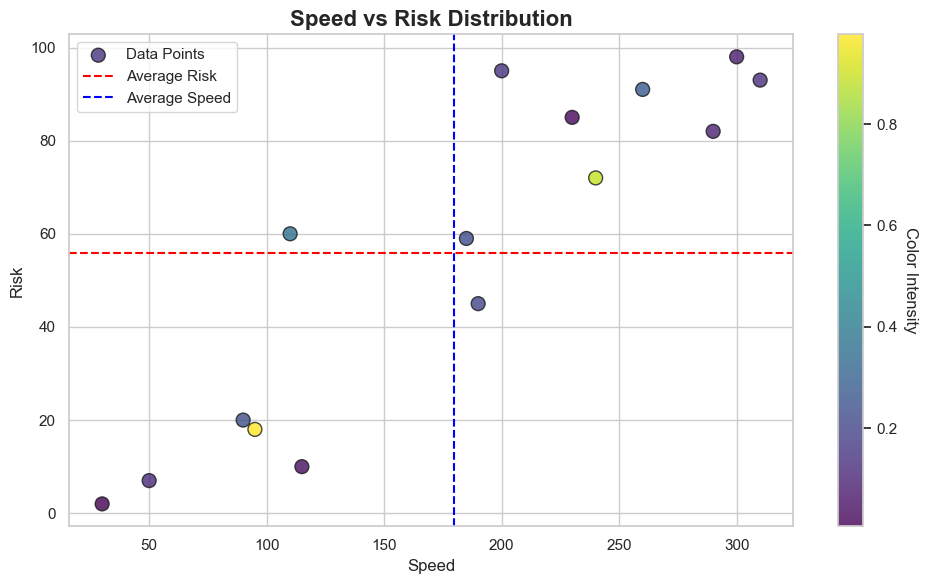

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_theme(style="whitegrid")

df['Color'] = np.random.rand(len(df))

plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    df['speed'], df['risk'], 
    c=df['Color'], cmap='viridis', s=100, alpha=0.8, edgecolors='k', 
    label="Data Points"
)

cbar = plt.colorbar(scatter)
cbar.set_label('Color Intensity', rotation=270, labelpad=15)

plt.axhline(y=df['risk'].mean(), color='red', linestyle='--', linewidth=1.5, label='Average Risk')
plt.axvline(x=df['speed'].mean(), color='blue', linestyle='--', linewidth=1.5, label='Average Speed')

plt.xlabel('Speed', fontsize=12)
plt.ylabel('Risk', fontsize=12)
plt.title('Speed vs Risk Distribution', fontsize=16, fontweight='bold')

plt.legend()
plt.tight_layout()
plt.show()


In [18]:
x = df['speed'].values.reshape(-1, 1)  # Converting to a 2D array with one column
y = df['risk'].values

# Linear Regression

In [19]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

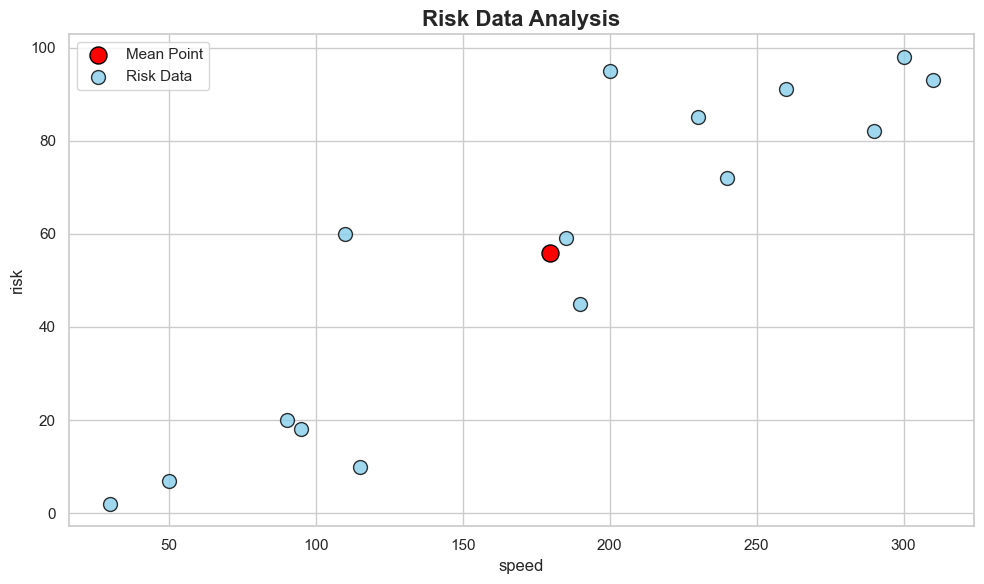

In [20]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))
plt.scatter(
    x.mean(), y.mean(), 
    color='red', s=150, edgecolors='black', label='Mean Point'
)
plt.scatter(
    df['speed'], df['risk'], 
    c='skyblue', s=100, alpha=0.8, edgecolors='black', label='Risk Data'
)

plt.xlabel('speed', fontsize=12)
plt.ylabel('risk', fontsize=12)
plt.title('Risk Data Analysis', fontsize=16, fontweight='bold')

plt.legend()
plt.tight_layout()
plt.show()


In [23]:
reg.fit(x,y)
m=reg.coef_
c=reg.intercept_
m*11 + c

array([-3.45537387])

In [27]:
df['Predicted_y']=reg.predict(x)
df.head()

,speed,risk,Color,lose,Predicted_y
0,200,95,0.145461,105,62.943434
1,90,20,0.236893,70,24.298625
2,300,98,0.080599,202,98.075079
3,110,60,0.362731,50,31.324954
4,240,72,0.892689,168,76.996092


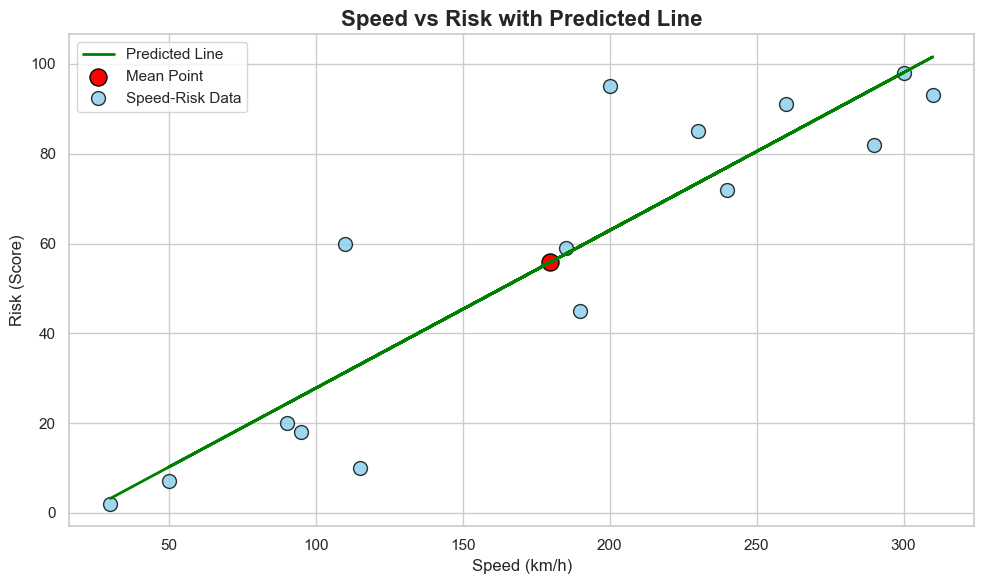

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))


plt.plot(
    x, reg.predict(x), 
    label='Predicted Line', color='green', linewidth=2
)


plt.scatter(
    x.mean(), y.mean(), 
    color='red', s=150, edgecolors='black', label='Mean Point'
)


plt.scatter(
    df['speed'], df['risk'], 
    c='skyblue', s=100, alpha=0.8, edgecolors='black', label='Speed-Risk Data'
)


plt.xlabel('Speed (km/h)', fontsize=12)
plt.ylabel('Risk (Score)', fontsize=12)
plt.title('Speed vs Risk with Predicted Line', fontsize=16, fontweight='bold')


plt.legend()


plt.tight_layout()
plt.show()


# Cost and Lose

In [37]:
df['lose']=df['speed'] - df['risk']

df.head()

,speed,risk,Color,lose,Predicted_y
0,200,95,0.145461,105,62.943434
1,90,20,0.236893,70,24.298625
2,300,98,0.080599,202,98.075079
3,110,60,0.362731,50,31.324954
4,240,72,0.892689,168,76.996092


# Checking performance

In [43]:
Performance= reg.score(x,y) * 100 
Performance

82.60542394120296

# 82.605 % Perofrmance